# Decision Tree Implementation

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [144]:
from sklearn.datasets import load_iris

In [145]:
iris=load_iris()

In [146]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [147]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [148]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [149]:
## independent features
X=pd.DataFrame(iris['data'],columns=['sepal lemgth in cm','sepal width','petal length','petal width'])

In [150]:
## dependent features
y=iris['target']

In [151]:
### train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [152]:
## apply decision tree classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier(max_depth=2) ## Post Pruning

In [153]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.159\nsamples = 46\nvalue = [0, 4, 42]')]

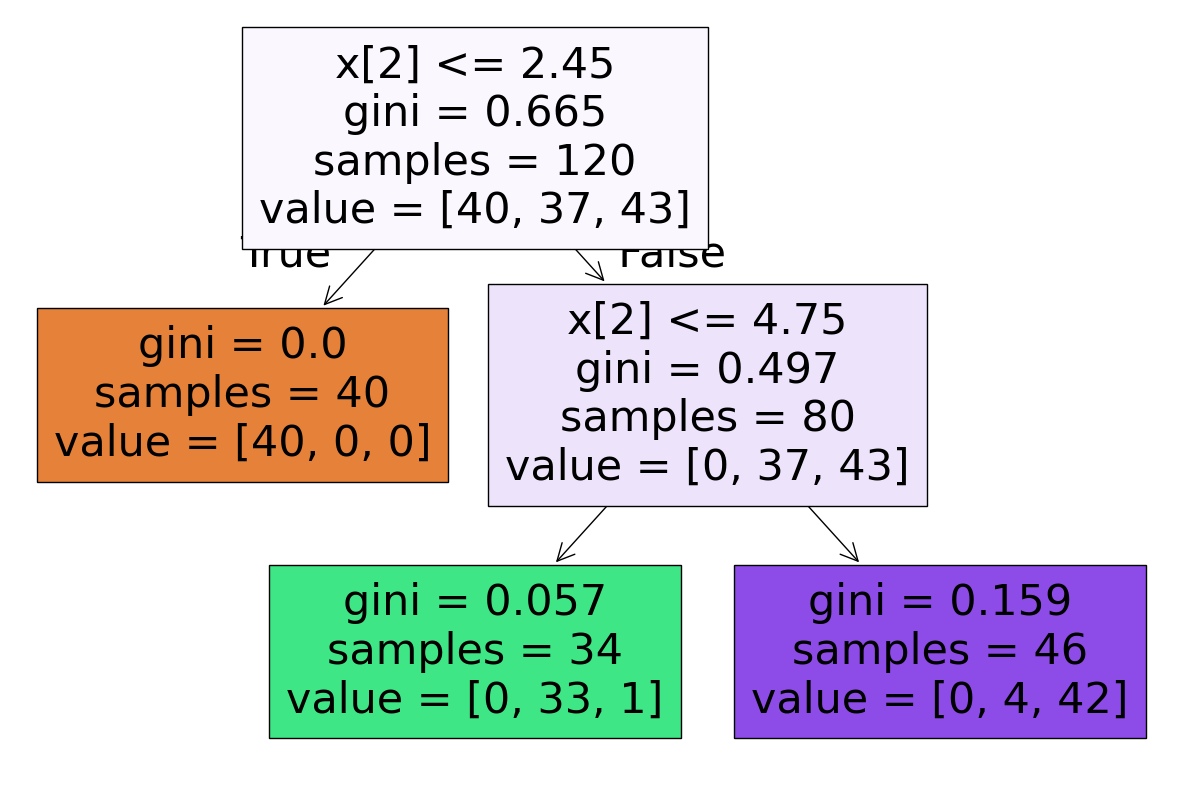

In [154]:
## Visualize the Decision Tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [155]:
y_pred=treeclassifier.predict(X_test)

In [156]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))


[[10  0  0]
 [ 0 11  0]
 [ 0  2  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.85      1.00      0.92        11
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



# Decision Tree Classifier Prepruning And Hyperparameter Tuning

In [157]:
param={
    'criterion':['gini','entropy','logloss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [158]:
from sklearn.model_selection import GridSearchCV
treemodel=DecisionTreeClassifier()
grid=GridSearchCV(treemodel,param_grid=param,cv=5,scoring='accuracy')

In [159]:
grid.fit(X_train,y_train)

C:\Users\enter\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\enter\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\enter\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\enter\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 436, in _validate_params
    vali

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [160]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [161]:
grid.best_score_

np.float64(0.9583333333333334)

In [162]:
y_pred1=grid.predict(X_test)

In [163]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(y_pred1,y_test))
print(classification_report(y_pred1,y_test))
print(accuracy_score(y_pred1,y_test))


[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


# Diabetes Prediction

In [164]:
from sklearn.datasets import load_diabetes

In [165]:
dbs=load_diabetes()

In [166]:
dbs

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [167]:
print(dbs['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [168]:
import pandas as pd
df_diabetes=pd.DataFrame(dbs.data,columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [169]:
## independent and dependent features
X=df_diabetes
y=dbs['target']

In [170]:
### train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [171]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

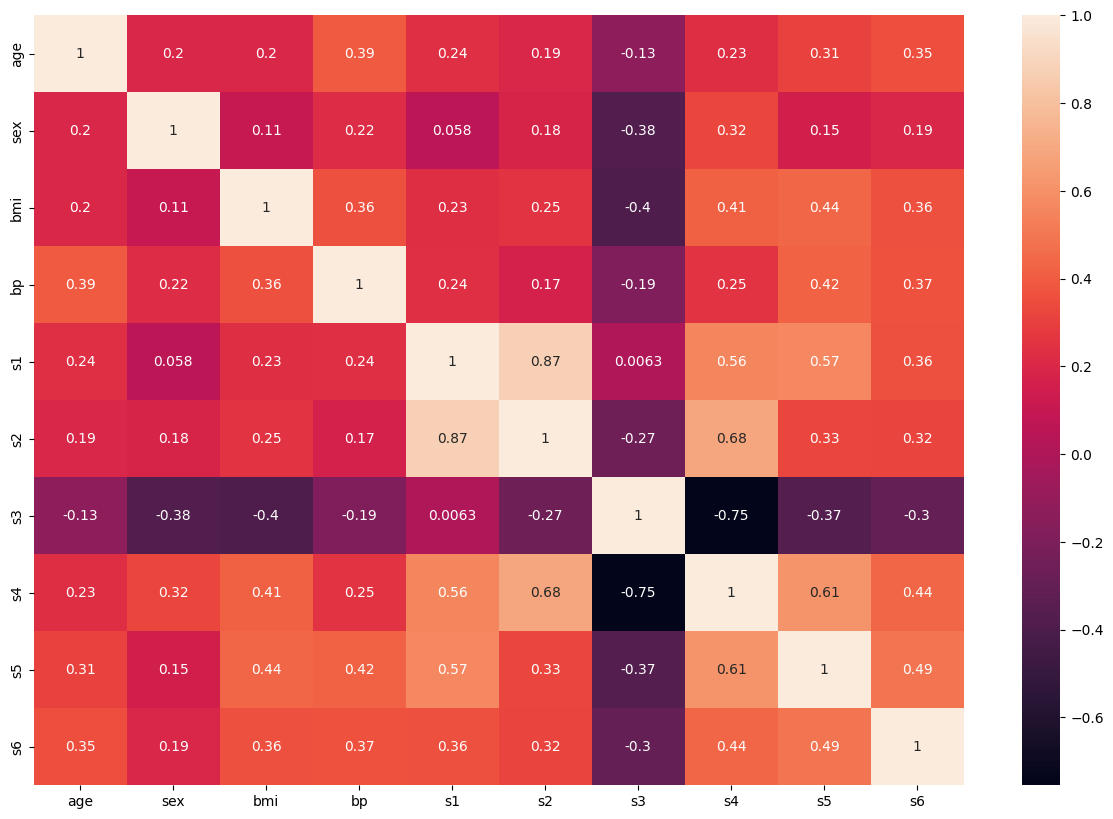

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [173]:
## apply decision tree classifier
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [174]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [175]:
y_pred=regressor.predict(X_test)

In [176]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))

-0.269941834179654
68.7593984962406
7914.654135338345


## Hyperparameter Tuning

In [177]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
    }

In [178]:
from sklearn.model_selection import GridSearchCV
regressor=DecisionTreeRegressor()
grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [179]:
grid.fit(X_train,y_train)

C:\Users\enter\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\enter\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\enter\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\enter\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 436, in _validate_params
    vali

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [180]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [181]:
y_pred=grid.predict(X_test)

In [182]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))

-1.34093777216478
60.8265062122082
5990.99749807845


In [188]:
selectedmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='random')

In [189]:
selectedmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

[Text(0.49107142857142855, 0.9, 'x[2] <= 0.027\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.26785714285714285, 0.7, 'x[6] <= 0.055\nfriedman_mse = 4223.827\nsamples = 227\nvalue = 132.524'),
 Text(0.3794642857142857, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'x[7] <= -0.031\nfriedman_mse = 4424.134\nsamples = 189\nvalue = 139.354'),
 Text(0.07142857142857142, 0.3, 'x[2] <= -0.029\nfriedman_mse = 4031.011\nsamples = 63\nvalue = 114.81'),
 Text(0.03571428571428571, 0.1, 'friedman_mse = 2007.969\nsamples = 33\nvalue = 97.97'),
 Text(0.10714285714285714, 0.1, 'friedman_mse = 5601.289\nsamples = 30\nvalue = 133.333'),
 Text(0.21428571428571427, 0.3, 'x[3] <= -0.021\nfriedman_mse = 4168.853\nsamples = 126\nvalue = 151.627'),
 Text(0.17857142857142858, 0.1, 'friedman_mse = 3152.916\nsamples = 36\nvalue = 134.028'),
 Text(0.25, 0.1, 'friedman_mse = 4401.778\nsamples = 90\nvalue = 158.667'),
 Text(0.39285714285714285, 0.5, 'x[7] <= -0.007\nfriedman_mse = 1841.458\ns

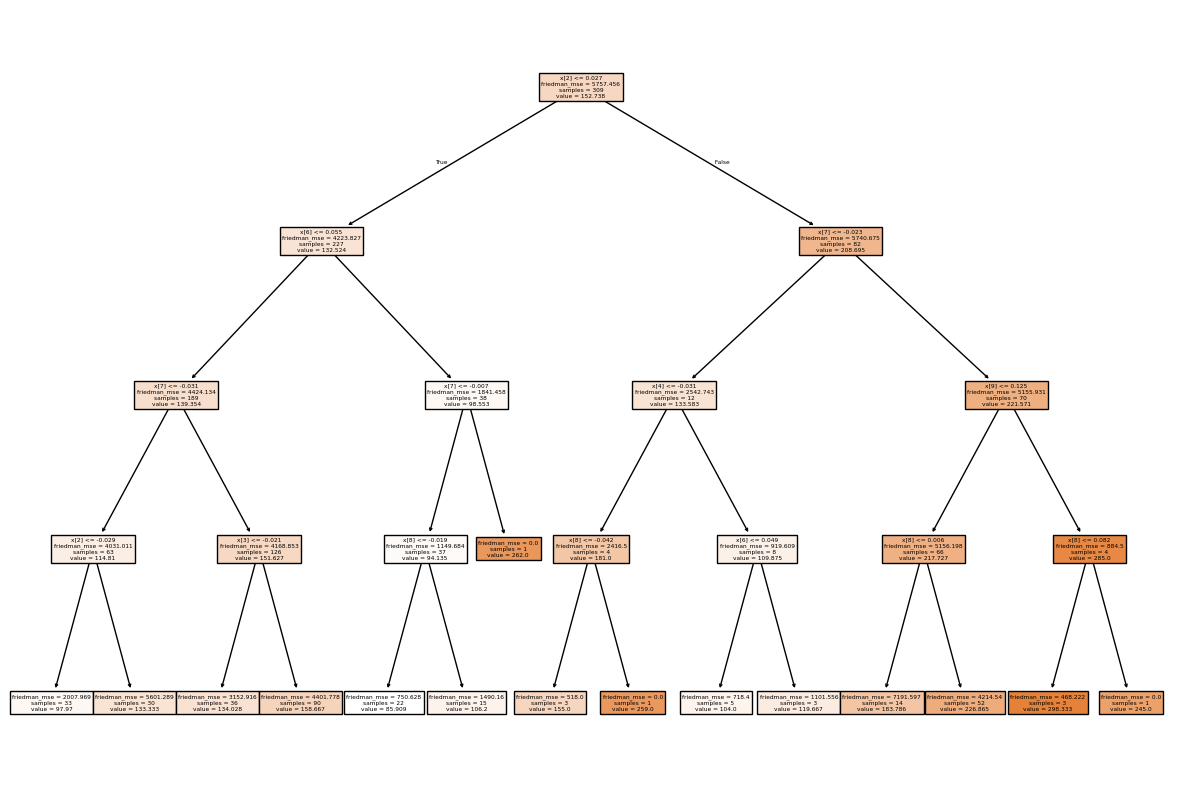

In [190]:
## Visualize the Decision Tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)

In [191]:
y_pred=selectedmodel.predict(X_test)

In [192]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))

-0.6935673270961431
55.191915018982684
4698.165300975406
